In [2]:
import os
import warnings

import matplotlib.pyplot as plt
# Import libraries
import numpy as np
from keras.layers import *
from keras.models import *
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras

warnings.filterwarnings('ignore')

In [16]:
import random


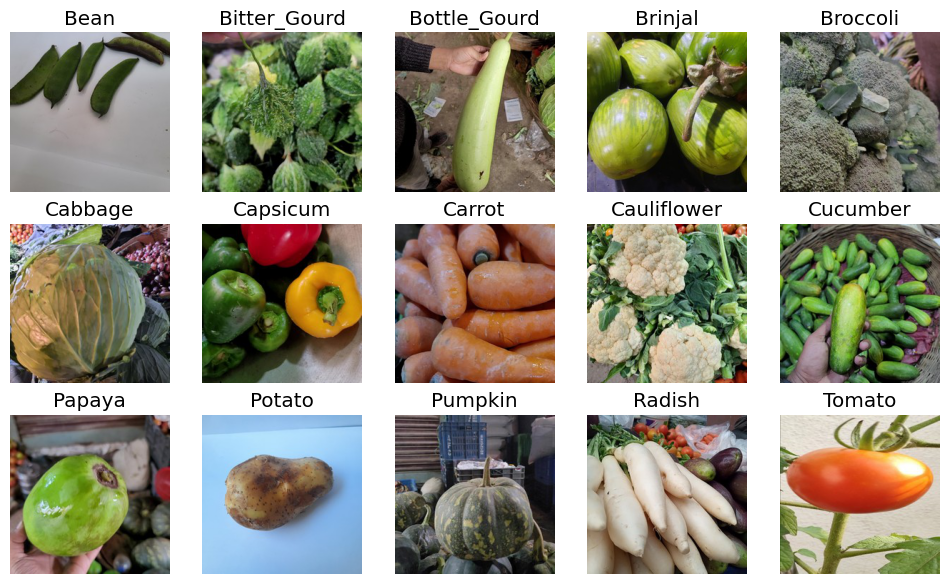

In [19]:
# Let's plot a few images
train_path = "data/vegetable-image-dataset/train"
validation_path = "data/vegetable-image-dataset/validation"
test_path = "data/vegetable-image-dataset/test"

image_categories = os.listdir('data/vegetable-image-dataset/train')
random_number_generator = [x for x in range(7)]
random_number = random.choice(random_number_generator)
def plot_images(image_categories):
    
    # Create a figure
    plt.figure(figsize=(12, 12))
    for i, cat in enumerate(image_categories):
        
        # Load images for the ith category
        image_path = train_path + '/' + cat
        images_in_folder = os.listdir(image_path)
        
        first_image_of_folder = images_in_folder[random_number]
        first_image_path = image_path + '/' + first_image_of_folder
        img = image.load_img(first_image_path)
        img_arr = image.img_to_array(img)/255.0
        
        
        # Create Subplot and plot the images
        plt.subplot(5, 5, i+1)
        plt.imshow(img_arr)
        plt.title(cat)
        plt.axis('off')
        
    plt.show()

# Call the function
plot_images(image_categories)

In [20]:
# Creating Image Data Generator for train, validation and test set

# 1. Train Set
train_gen = ImageDataGenerator(rescale = 1.0/255.0) # Normalise the data
train_image_generator = train_gen.flow_from_directory(
                                            train_path,
                                            target_size=(150, 150),
                                            batch_size=32,
                                            class_mode='categorical')

# 2. Validation Set
val_gen = ImageDataGenerator(rescale = 1.0/255.0) # Normalise the data
val_image_generator = train_gen.flow_from_directory(
                                            validation_path,
                                            target_size=(150, 150),
                                            batch_size=32,
                                            class_mode='categorical')

# 3. Test Set
test_gen = ImageDataGenerator(rescale = 1.0/255.0) # Normalise the data
test_image_generator = train_gen.flow_from_directory(
                                            test_path,
                                            target_size=(150, 150),
                                            batch_size=32,
                                            class_mode='categorical')

Found 15000 images belonging to 15 classes.
Found 3000 images belonging to 15 classes.
Found 3000 images belonging to 15 classes.


In [21]:
# Print the class encodings done by the generators
class_map = dict([(v, k) for k, v in train_image_generator.class_indices.items()])
print(class_map)

{0: 'Bean', 1: 'Bitter_Gourd', 2: 'Bottle_Gourd', 3: 'Brinjal', 4: 'Broccoli', 5: 'Cabbage', 6: 'Capsicum', 7: 'Carrot', 8: 'Cauliflower', 9: 'Cucumber', 10: 'Papaya', 11: 'Potato', 12: 'Pumpkin', 13: 'Radish', 14: 'Tomato'}


In [22]:
# Build a custom sequential CNN model

model = Sequential() # model object

# Add Layers
model.add(Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu', input_shape=[150, 150, 3]))
model.add(MaxPooling2D(2, ))
model.add(Conv2D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(MaxPooling2D(2))

# Flatten the feature map
model.add(Flatten())

# Add the fully connected layers
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(128, activation='relu'))
model.add(Dense(15, activation='softmax'))

# print the model summary
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 150, 150, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 75, 75, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 75, 75, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 37, 37, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 87616)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │      11,214,976 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 15)                  │           1,935 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,252,815 (42.93 MB)

 Trainable params: 11,252,815 (42.93 MB)

 Non-trainable params: 0 (0.00 B)

In [23]:
# Compile and fit the model
early_stopping = keras.callbacks.EarlyStopping(patience=5) # Set up callbacks
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
hist = model.fit(train_image_generator, 
                 epochs=1, 
                 verbose=1, 
                 validation_data=val_image_generator, 
                 steps_per_epoch = 15000//32, 
                 validation_steps = 3000//32, 
                 callbacks=early_stopping)

468/468 ━━━━━━━━━━━━━━━━━━━━ 123s 258ms/step - accuracy: 0.3812 - loss: 1.9393 - val_accuracy: 0.8219 - val_loss: 0.5682


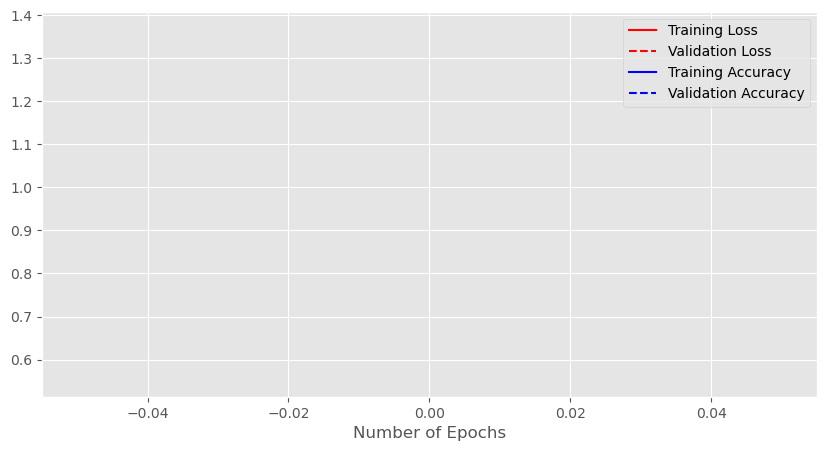

In [24]:
# Plot the error and accuracy
h = hist.history
plt.style.use('ggplot')
plt.figure(figsize=(10, 5))
plt.plot(h['loss'], c='red', label='Training Loss')
plt.plot(h['val_loss'], c='red', linestyle='--', label='Validation Loss')
plt.plot(h['accuracy'], c='blue', label='Training Accuracy')
plt.plot(h['val_accuracy'], c='blue', linestyle='--', label='Validation Accuracy')
plt.xlabel("Number of Epochs")
plt.legend(loc='best')
plt.show()

In [25]:
# Predict the accuracy for the test set
model.evaluate(test_image_generator)

94/94 ━━━━━━━━━━━━━━━━━━━━ 8s 81ms/step - accuracy: 0.8199 - loss: 0.5515


[0.5589742064476013, 0.8173333406448364]

In [32]:
random_test = 'data/vegetable-image-dataset/test/Broccoli'
random_number

In [34]:
random_number

3

In [33]:
os.listdir(random_test)

['1001.jpg',
 '1002.jpg',
 '1003.jpg',
 '1004.jpg',
 '1005.jpg',
 '1006.jpg',
 '1007.jpg',
 '1008.jpg',
 '1009.jpg',
 '1010.jpg',
 '1011.jpg',
 '1012.jpg',
 '1013.jpg',
 '1014.jpg',
 '1015.jpg',
 '1016.jpg',
 '1017.jpg',
 '1018.jpg',
 '1019.jpg',
 '1020.jpg',
 '1021.jpg',
 '1022.jpg',
 '1023.jpg',
 '1024.jpg',
 '1025.jpg',
 '1026.jpg',
 '1027.jpg',
 '1028.jpg',
 '1029.jpg',
 '1030.jpg',
 '1031.jpg',
 '1032.jpg',
 '1033.jpg',
 '1034.jpg',
 '1035.jpg',
 '1036.jpg',
 '1037.jpg',
 '1038.jpg',
 '1039.jpg',
 '1040.jpg',
 '1041.jpg',
 '1042.jpg',
 '1043.jpg',
 '1044.jpg',
 '1045.jpg',
 '1046.jpg',
 '1047.jpg',
 '1048.jpg',
 '1049.jpg',
 '1050.jpg',
 '1051.jpg',
 '1052.jpg',
 '1053.jpg',
 '1054.jpg',
 '1055.jpg',
 '1056.jpg',
 '1057.jpg',
 '1058.jpg',
 '1059.jpg',
 '1060.jpg',
 '1061.jpg',
 '1062.jpg',
 '1063.jpg',
 '1064.jpg',
 '1065.jpg',
 '1066.jpg',
 '1067.jpg',
 '1068.jpg',
 '1069.jpg',
 '1070.jpg',
 '1071.jpg',
 '1072.jpg',
 '1073.jpg',
 '1074.jpg',
 '1075.jpg',
 '1076.jpg',
 '1077.jpg',

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


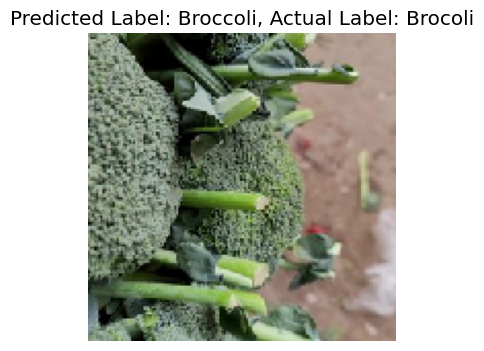

In [26]:
# Testing the Model
test_image_path = 'data/vegetable-image-dataset/test/Broccoli/1011.jpg'
random_test = 'data/vegetable-image-dataset/test/Broccoli/' + 
random_number

def generate_predictions(test_image_path, actual_label):
    
    # 1. Load and preprocess the image
    test_img = image.load_img(test_image_path, target_size=(150, 150))
    test_img_arr = image.img_to_array(test_img)/255.0
    test_img_input = test_img_arr.reshape((1, test_img_arr.shape[0], test_img_arr.shape[1], test_img_arr.shape[2]))

    # 2. Make Predictions
    predicted_label = np.argmax(model.predict(test_img_input))
    predicted_vegetable = class_map[predicted_label]
    plt.figure(figsize=(4, 4))
    plt.imshow(test_img_arr)
    plt.title("Predicted Label: {}, Actual Label: {}".format(predicted_vegetable, actual_label))
    plt.grid()
    plt.axis('off')
    plt.show()

# call the function
generate_predictions(test_image_path, actual_label='Brocoli')